# Logistic Regression 

In this notebook I will be creating and optimising a binary classification model using Logisitic Regression. The data has already been cleaned and any categorical data has been converted into numerical data as shown below.

In [113]:
 
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix, roc_curve, auc, roc_auc_score, precision_score,f1_score,recall_score
import matplotlib.pyplot as plt




In [77]:
df = pd.read_csv('my_full_data.csv')
df 

,Unnamed: 0,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,open_acc,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,application_type,tax_liens
0,0,68387134,2500.0,0,17.27,89.47,3,1,1,50000.0,...,9,9,17.60,7.0,22.0,1,669.0,665.0,0,0.0
1,1,66615254,7200.0,0,17.27,257.67,3,9,4,20000.0,...,2,18,13.21,8.0,17.0,1,549.0,545.0,0,0.0
2,2,68376899,16000.0,0,10.78,522.16,1,5,5,63000.0,...,2,33,35.19,12.0,22.0,1,594.0,590.0,0,0.0
3,3,68366850,16000.0,0,5.32,481.84,0,8,1,96000.0,...,2,22,14.45,23.0,38.0,1,744.0,740.0,0,0.0
4,4,67195202,13000.0,1,16.59,320.23,3,10,5,40000.0,...,2,11,16.74,6.0,17.0,1,569.0,565.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26113,26113,90441274,12000.0,0,13.99,410.08,2,0,5,47000.0,...,1,25,31.79,13.0,28.0,0,754.0,750.0,0,0.0
26114,26114,90404436,25000.0,1,25.69,743.94,5,6,1,70000.0,...,9,5,15.10,9.0,19.0,0,499.0,0.0,0,0.0
26115,26115,90393111,16000.0,0,12.79,537.49,2,1,4,48000.0,...,2,4,33.60,11.0,17.0,0,699.0,695.0,0,0.0
26116,26116,90304259,35000.0,1,15.59,843.53,2,1,1,180000.0,...,2,9,13.09,17.0,31.0,0,714.0,710.0,0,0.0


In [78]:
print(df['loan_status']) #Our target variable

0        1
1        0
2        0
3        1
4        0
        ..
26113    1
26114    0
26115    1
26116    1
26117    1
Name: loan_status, Length: 26118, dtype: int64


## Baseline model  

Our data is ready to be split into our training and testing data. I will perform the basic Logisitic Regression classsifier from the `sklearn` package which later on in this notebook I will look to optimise it via comaprison with performance metrics. First I will take our target variable the loan status and drop it from the data, perform our cross validation and examine performance and information such as the shape of each split, the model accuracy, classfication report and confusion matrix.

In [79]:
y = df['loan_status'] 
X = df.drop(columns=['id', 'loan_status'])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((20894, 20), (5224, 20))

We will be using the built in Logisitic Regression function without altering any hyperparameters to being with. Such hyperparameters we will look to adjust later inclue the solver, which helps minimise the loss function and the value of C, which affects the regularization with an inverse relationship. Luckily we can later use the `GridSearchCV` technique to tune these and more hyperparameters. 

In [116]:
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



Model accuracy score: 0.8111

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.16      0.27      1144
           1       0.81      0.99      0.89      4080

    accuracy                           0.81      5224
   macro avg       0.85      0.58      0.58      5224
weighted avg       0.83      0.81      0.75      5224

Confusion Matrix:
 [[ 180  964]
 [  23 4057]]
Precision: 0.81
Recall: 0.99
F1 Score: 0.89


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The warning given indicates that to maybe look at increasing the max iterations or scaling the data may be helpful.

It might be useful to see how represent a normalised version of this confusion matrix to compare easily with other models. We can see below that its performance with regards to prectiting when a loan will be paid is far superior to predcting when a loan will not be paid.

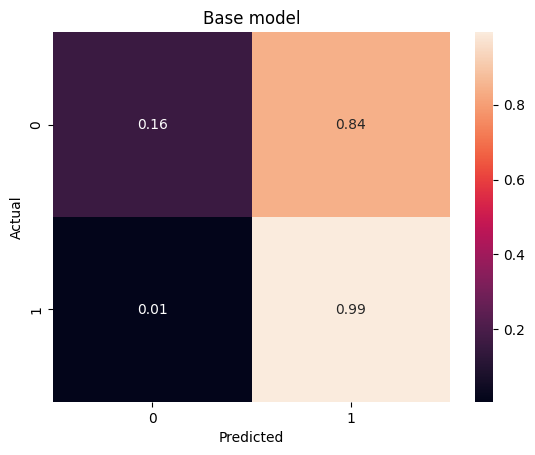

In [85]:
cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f',)
plt.title('Base model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We can see a low level of precision in this model as there were a large percentage of the loan_status=0 that was predicted to be fully paid back, which makes the base model not appropiate at all for a risk-averse loaner.

We must also check if the model accuracy is good by comapring it to the accuracy of a model that only predicts the most popular option, in this case the loan being paid back. 

In [82]:
null_accuracy = (4080/(4080+1144))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7810


Model accuracy is slightly higher so we can say that it is performing okay, but the difference is only around 3% which we can hopefully improve. 

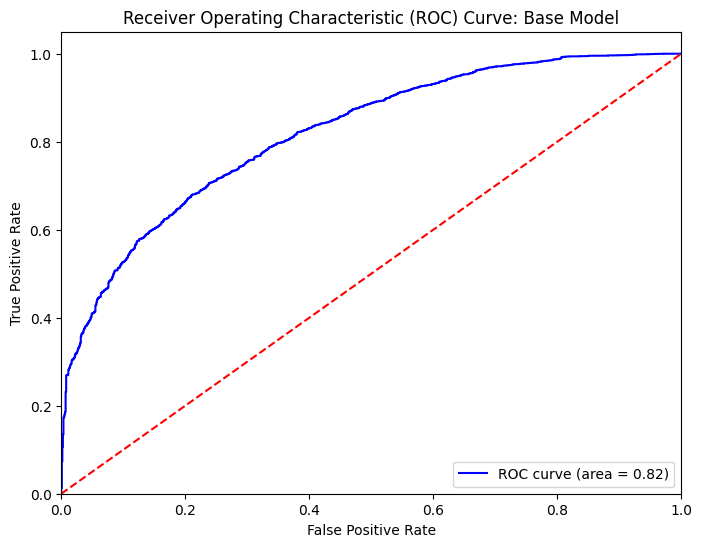

In [83]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Base Model')
plt.legend(loc='lower right')
plt.show()

This concludes our analysis of how the baseline model performs without any adjustments to the data, predictive paramteres used etc. We will look to improve metrics such as the AUC, True Negative rate. It is important to consider which metrics are best to optimise for the purpose of our data set.


## What are we looking to maximise? 
We first must consider what metrics are important to us. Things like the model accuracy provide a general idea on how the model is performing, but can be suceptible to class imbalance. In the case of loan approval, it is most costly to approve loans that end up defaulting. Hence we would like the model to have a high precision. In most cases, the False Negative rate does not need to be minismied as for a risk-averse loaner, the cost of missing out on giving someone a loan who could have payed it back fully is far less than being too risk-loving and approving a loan to someone who is going to default it. 

From the data above, we have seen there is a big class imbalance between the amount of loans not fully paid (around 20%) and the loans which were fully paid. Hence metrics like the area under and ROC cruve(AUC-ROC and AUC-PR) and F1 score become more informative than other metrics.

## Adjustments
### 1. Optimising Hyperparameters 
It is clear that the model could do with some hyperparameter tuning. We will use the `GridSearchCV` to go through different paramter conditions and idnetifying which are best for maximising the F1 score. We choose the F1 score at first to stop the model being too conservative if we scored based on precision, as the F1 score will acount for a balance between precision and recall. We can then compare using a precision scoring to how the parameters differ and see which paramters we wish to go ahead with, as we may prefer to sacrifice some recall if we are a more risk-averse loaner.


In [146]:
param_grid = {
    'C': [0.1,1,10,100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear' ], #using other solvers caused errors with number of iterations so liblinear is only viable option
    'max_iter': [500, 1000, 2000],
    'tol': [1e-4, 1e-3],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='f1', cv=5, verbose=1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

From this we can see that the best hyper parameters are C= 100, max iterations = 2000, penalty = l1, solver= liblinear, tol=0.0001. Now lets run the same performance tests as earlier to comapare base model.

In [135]:
model_1 = LogisticRegression(C=100, penalty='l1',max_iter=2000,solver= 'liblinear', tol=0.0001)

model_1.fit(X_train, y_train)
y_pred_1= model_1.predict(X_test)

precision= precision_score(y_test, y_pred_1)
recall = recall_score(y_test, y_pred_1)
f1 = f1_score(y_test, y_pred_1)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_1)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_1))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Model accuracy score: 0.8905

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74      1144
           1       0.92      0.95      0.93      4080

    accuracy                           0.89      5224
   macro avg       0.85      0.82      0.83      5224
weighted avg       0.89      0.89      0.89      5224

Confusion Matrix:
 [[ 796  348]
 [ 224 3856]]
Precision: 0.92
Recall: 0.95
F1 Score: 0.93


As stated earlier, we may want to look at just maximising the precision, hence lets do a grid search scoring against precision

In [136]:
param_grid = {
    'C': [0.1,1,10,100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear'],
    'max_iter': [ 500, 1000, 2000],
    'tol': [1e-4, 1e-3],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='precision', cv=5, verbose=1) #testing against precision instead

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best Hyperparameters: {'C': 100, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


We actually see that the same hyperparameters maximise precision as the F1 score, which is not surprising, so we will go forward using the updated hyperparameters model. Lets compare the ROC curve against the base model.

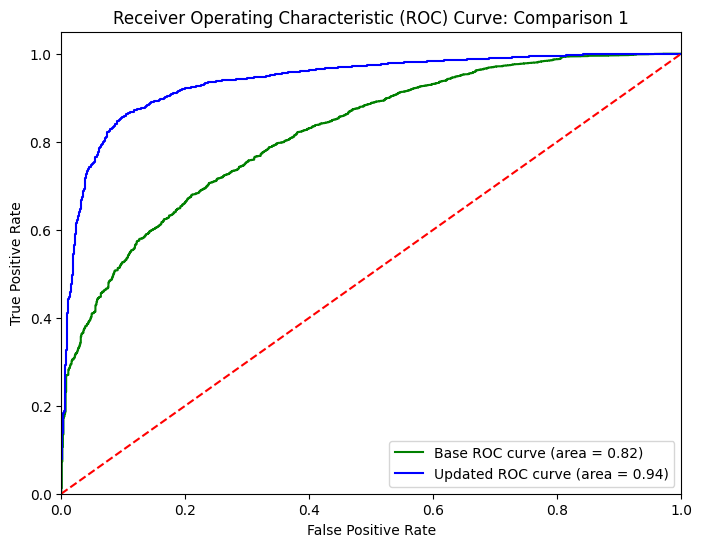

In [145]:
y_scores_1 = model_1.predict_proba(X_test)[:, 1]
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_scores_1)
roc_auc_1 = auc(fpr_1, tpr_1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'Base ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_1, tpr_1, color='blue', label=f'Updated ROC curve (area = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Comparison 1')
plt.legend(loc='lower right')
plt.show()

We notice a much improved ROC curve now,

### 2. Class Imbalances 
As stated above, class imbalance could be a problem affecting the model at the moment. The accurate predicition of a loan defaulting is important however one may argue its more important to predict correctly that a loan will be payed back rather than incorrectly rejecting a loan. So although the class imbalance is affecting the recall and False Negative rate it is not of upmost improtant to a risk-averse loanee. However we will still test metrics over a more balanced data set. 

In logisitic regression, we use weighted classes and its best practice to use the inverse of the label distribution. 78% of the data is in the loan_status=1 catergory. Below we will do a normalised confusion matrix comaprison between unweighted classes and weighted classes.

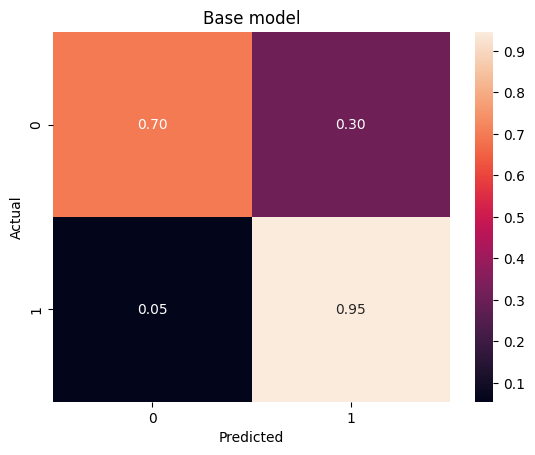

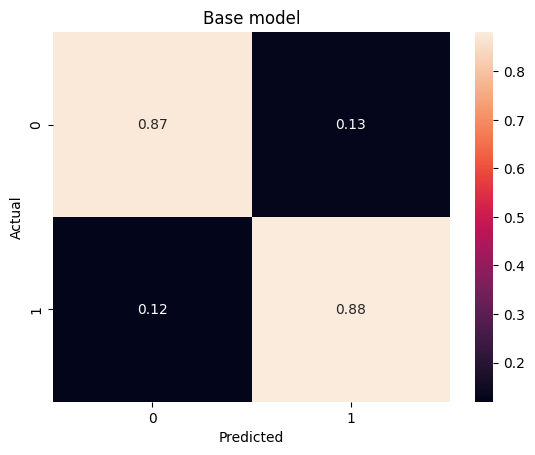

In [139]:
ratio = null_accuracy/(1-null_accuracy)

class_weights={0: ratio, 1: 1} #balanced weights



y_pred_1 = model_1.predict(X_test)


cm_1 = confusion_matrix(y_test, y_pred_1) #confusion matrix of unbalanced weighted classes

cm_1_normalized = cm_1.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_1_normalized, annot=True, fmt='.2f',)
plt.title('Base model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

model_w= LogisticRegression(C=100, penalty='l1',max_iter=2000,solver= 'liblinear', tol=0.0001,class_weight=class_weights) 
y_pred_w = model_w.predict(X_test)


cm_w = confusion_matrix(y_test, y_pred_w) #confusion matrix of balanced weighted classes

cm_w_normalized = cm_w.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_w_normalized, annot=True, fmt='.2f',)
plt.title('Base model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



It appears that the weighted version has a better job at reducing the False Positive rate which is our main aim that we are trying to minimise, and maximising the True Negative rate. Lets have a look at all the performance metrics again.

In [140]:
precision= precision_score(y_test, y_pred_w)
recall = recall_score(y_test, y_pred_w)
f1 = f1_score(y_test, y_pred_w)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_w)))
print("\nClassification Report:\n", classification_report(y_test, y_pred_w))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_w))
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Model accuracy score: 0.8788

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76      1144
           1       0.96      0.88      0.92      4080

    accuracy                           0.88      5224
   macro avg       0.82      0.88      0.84      5224
weighted avg       0.90      0.88      0.88      5224

Confusion Matrix:
 [[ 998  146]
 [ 487 3593]]
Precision: 0.96
Recall: 0.88
F1 Score: 0.92


We can see that we have sacrificed some recall here, but for the purpose of our data set I think this is a valid amount of compensastion and achieves our purpose better of increasing the precision. Lets look at ROC curve.

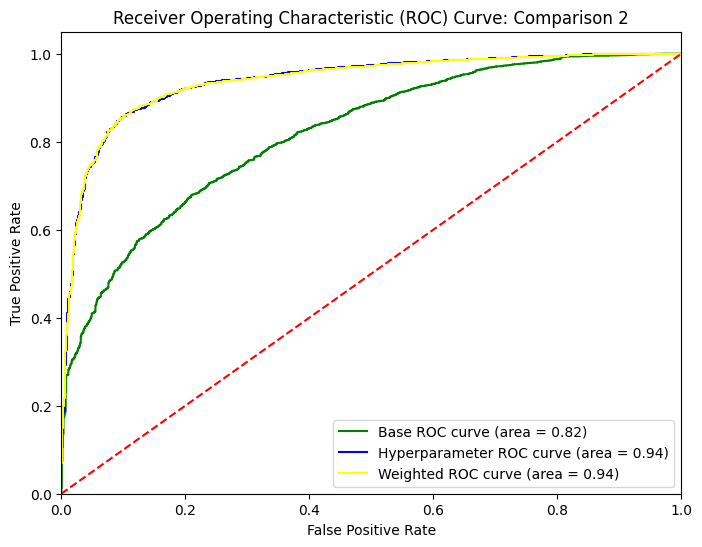

In [144]:
y_scores_w = model_w.predict_proba(X_test)[:, 1]
fpr_w, tpr_w, thresholds_w = roc_curve(y_test, y_scores_w)
roc_auc_w = auc(fpr_w, tpr_w)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'Base ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_1, tpr_1, color='blue', label=f'Hyperparameter ROC curve (area = {roc_auc_1:.2f})')
plt.plot(fpr_w, tpr_w, color='yellow', label=f'Weighted ROC curve (area = {roc_auc_w:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Comparison 2')
plt.legend(loc='lower right')
plt.show()